In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle          

In [5]:
train_data=r"C:\Users\ADMIN\Downloads\archive_catdog\dog vs cat\dataset\training_set"
test_data=r"C:\Users\ADMIN\Downloads\archive_catdog\dog vs cat\dataset\test_set"

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_data=train_datagen.flow_from_directory(train_data,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode="binary")
test_set=test_datagen.flow_from_directory(test_data,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode="binary")


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


In [17]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))            #from 0 to 1 indicating the prob. cat will have a higher pred depending on prediction



In [18]:
#Add loss funcn and optimizers 
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [20]:
history=model.fit_generator(training_data,epochs=25,validation_data=test_set)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10348\3421988257.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(training_data,epochs=25,validation_data=test_set)


Epoch 1/25
250/250 [==============================] - 174s 687ms/step - loss: 0.6824 - accuracy: 0.5765 - val_loss: 0.6255 - val_accuracy: 0.6575
Epoch 2/25
250/250 [==============================] - 71s 285ms/step - loss: 0.6088 - accuracy: 0.6637 - val_loss: 0.5550 - val_accuracy: 0.7165
Epoch 3/25
250/250 [==============================] - 70s 278ms/step - loss: 0.5581 - accuracy: 0.7141 - val_loss: 0.5625 - val_accuracy: 0.7060
Epoch 4/25
250/250 [==============================] - 69s 275ms/step - loss: 0.5239 - accuracy: 0.7349 - val_loss: 0.5014 - val_accuracy: 0.7600
Epoch 5/25
250/250 [==============================] - 69s 277ms/step - loss: 0.5028 - accuracy: 0.7516 - val_loss: 0.5054 - val_accuracy: 0.7625
Epoch 6/25
250/250 [==============================] - 68s 274ms/step - loss: 0.4874 - accuracy: 0.7660 - val_loss: 0.4701 - val_accuracy: 0.7790
Epoch 7/25
250/250 [==============================] - 68s 272ms/step - loss: 0.4650 - accuracy: 0.7797 - val_loss: 0.4730 - val_a

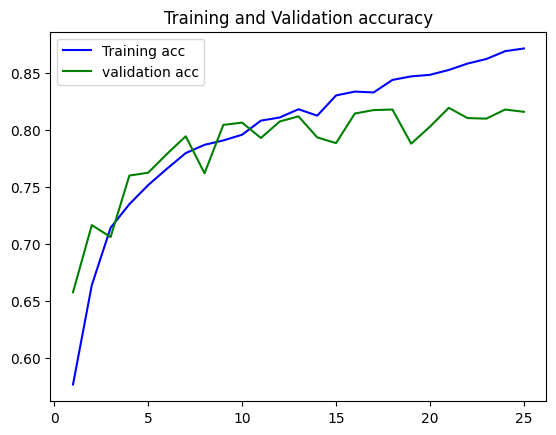

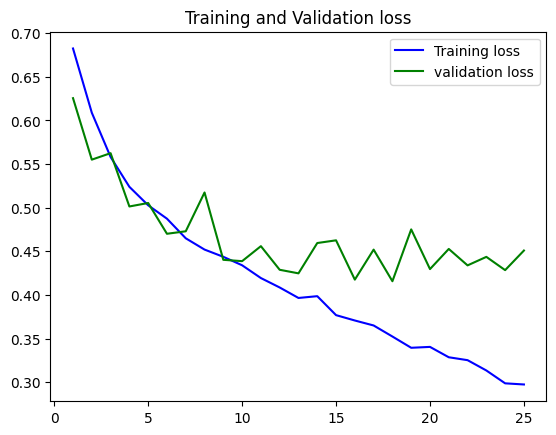

In [21]:
import matplotlib.pyplot as plt
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,"b",label="Training acc")
plt.plot(epochs,val_acc,"g",label="validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,loss,"b",label="Training loss")
plt.plot(epochs,val_loss,"g",label="validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()